In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_dados = pd.read_csv("dados_1997_2011_paises_csv.csv", sep=";", encoding="latin1", decimal=",")
df_dados.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215


### Análises

In [5]:
# Add/Mod columns
df_dados["ln_pop"] = df_dados["populacao"].apply(lambda x: np.log(x))
df_dados.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632,10.677146
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924,10.691079
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272,10.703835
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098,10.715841
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215,10.727141


In [6]:
# Select columns
df_dados[['pais', 'ano', 'idh']].head()

,pais,ano,idh
0,África do Sul,1997,0.6328
1,África do Sul,1998,0.6272
2,África do Sul,1999,0.6216
3,África do Sul,2000,0.6160
4,África do Sul,2001,0.6126


In [7]:
# Filtrar linha de dados
df_dados.query("ano == 2010").head()
df_dados[df_dados["ano"] == 2010].head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
13,África do Sul,2010,0.615,49,54.09,65.60,3.637039e+08,49109.10700,10.801800
28,Alemanha,2010,0.903,79,82.73,84.16,3.280530e+09,81906.32178,11.313331
43,Austrália,2010,0.927,87,92.17,83.82,1.131623e+09,21515.44693,9.976526
58,Bélgica,2010,0.885,73,73.59,92.95,4.693742e+08,10423.49300,9.251817
73,Brasil,2010,0.715,35,56.53,60.38,2.087900e+09,201103.25150,12.211574


In [8]:
# Sumarizar dados
df_dados.agg(idh_total = pd.NamedAgg(column='idh', aggfunc='sum'))

,idh
idh_total,227.9572


In [9]:
# order data
df_dados.sort_values(by="ano", ascending=True).head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
0,África do Sul,1997,0.6328,56,44.54,52.60298,1.488142e+08,43353.63200,10.677146
225,Japão,1997,0.8572,67,70.51,59.37612,2.594566e+06,125924.56200,11.743438
180,Holanda,1997,0.8724,87,80.31,88.54621,3.117163e+05,15607.15025,9.655484
105,Cingapura,1997,0.7404,93,90.24,85.63774,1.045617e+08,3769.76000,8.234767
45,Bélgica,1997,0.8628,69,65.42,91.74219,2.497663e+08,10199.78700,9.230122


In [10]:
# Pivot
# Index X axis, columns y axix and values are disposall
df_dados.pivot_table(index='ano', columns='pais', values='idh')

pais,Alemanha,Austrália,Brasil,Bélgica,Canadá,China,Cingapura,Coréia,Espanha,Estados Unidos,França,Holanda,Itália,Japão,México,Reino Unido,Rússia,África do Sul,Índia
ano,,,,,,,,,,,,,,,,,,,
1997,0.8466,0.8958,0.6464,0.8628,0.8736,0.5598,0.7404,0.8078,0.8162,0.8886,0.8298,0.8724,0.8070,0.8572,0.6916,0.8228,0.6814,0.6328,0.4466
1998,0.8524,0.8992,0.6526,0.8672,0.8754,0.5692,0.7606,0.8152,0.8238,0.8914,0.8352,0.8756,0.8130,0.8608,0.7004,0.8262,0.6846,0.6272,0.4514
1999,0.8582,0.9026,0.6588,0.8716,0.8772,0.5786,0.7808,0.8226,0.8314,0.8942,0.8406,0.8788,0.8190,0.8644,0.7092,0.8296,0.6878,0.6216,0.4562
2000,0.8640,0.9060,0.6650,0.8760,0.8790,0.5880,0.8010,0.8300,0.8390,0.8970,0.8460,0.8820,0.8250,0.8680,0.7180,0.8330,0.6910,0.6160,0.4610
2001,0.8702,0.9084,0.6704,0.8754,0.8816,0.5970,0.8078,0.8372,0.8426,0.8980,0.8506,0.8836,0.8322,0.8716,0.7226,0.8374,0.6978,0.6126,0.4696
2002,0.8764,0.9108,0.6758,0.8748,0.8842,0.6060,0.8146,0.8444,0.8462,0.8990,0.8552,0.8852,0.8394,0.8752,0.7272,0.8418,0.7046,0.6092,0.4782
2003,0.8826,0.9132,0.6812,0.8742,0.8868,0.6150,0.8214,0.8516,0.8498,0.9000,0.8598,0.8868,0.8466,0.8788,0.7318,0.8462,0.7114,0.6058,0.4868
2004,0.8888,0.9156,0.6866,0.8736,0.8894,0.6240,0.8282,0.8588,0.8534,0.9010,0.8644,0.8884,0.8538,0.8824,0.7364,0.8506,0.7182,0.6024,0.4954
2005,0.8950,0.9180,0.6920,0.8730,0.8920,0.6330,0.8350,0.8660,0.8570,0.9020,0.8690,0.8900,0.8610,0.8860,0.7410,0.8550,0.7250,0.5990,0.5040


In [11]:
# Melt
df_dados.melt(id_vars=['pais', 'ano'], var_name='indicaroes', value_name='indices')

,pais,ano,indicaroes,indices
0,África do Sul,1997,idh,0.632800
1,África do Sul,1998,idh,0.627200
2,África do Sul,1999,idh,0.621600
3,África do Sul,2000,idh,0.616000
4,África do Sul,2001,idh,0.612600
...,...,...,...,...
1990,Reino Unido,2007,ln_pop,11.024145
1991,Reino Unido,2008,ln_pop,11.030546
1992,Reino Unido,2009,ln_pop,11.036276
1993,Reino Unido,2010,ln_pop,11.041932


In [12]:
# Concatenate
df_dados['pais'] + '_' + df_dados['ano'].astype('str')

0      África do Sul_1997
1      África do Sul_1998
2      África do Sul_1999
3      África do Sul_2000
4      África do Sul_2001
              ...        
280      Reino Unido_2007
281      Reino Unido_2008
282      Reino Unido_2009
283      Reino Unido_2010
284      Reino Unido_2011
Length: 285, dtype: object

### Graficos

In [13]:
# Bar Graph
dados_2010 = df_dados.query("ano == 2010")
dados_2010

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
13,África do Sul,2010,0.615,49,54.09,65.60,3.637039e+08,4.910911e+04,10.801800
28,Alemanha,2010,0.903,79,82.73,84.16,3.280530e+09,8.190632e+04,11.313331
43,Austrália,2010,0.927,87,92.17,83.82,1.131623e+09,2.151545e+04,9.976526
58,Bélgica,2010,0.885,73,73.59,92.95,4.693742e+08,1.042349e+04,9.251817
73,Brasil,2010,0.715,35,56.53,60.38,2.087900e+09,2.011033e+05,12.211574
88,Canadá,2010,0.907,87,90.46,88.24,1.577040e+09,3.375974e+04,10.427024
103,China,2010,0.682,36,80.18,62.68,5.926612e+09,1.337938e+06,14.106640
118,Cingapura,2010,0.864,92,100.00,84.58,2.087650e+08,5.140105e+03,8.544829
133,Coréia,2010,0.894,56,76.25,64.73,1.014483e+09,4.863607e+04,10.792121
148,Espanha,2010,0.876,65,58.75,82.94,1.407405e+09,4.650596e+04,10.747336


Text(0.5, 1.0, 'Corrupção por país em 2010')

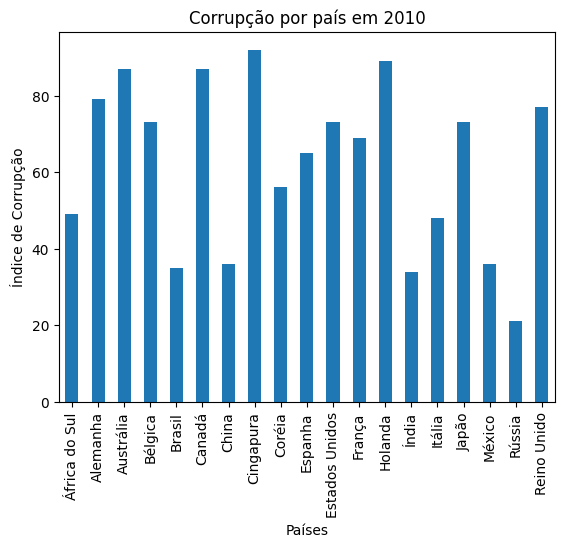

In [19]:
x_axi = dados_2010.plot.bar(x = 'pais', y = 'corrupcao_indice', legend=None)
plt.xlabel("Países")
plt.ylabel("Índice de Corrupção")
plt.title("Corrupção por país em 2010")

/tmp/ipykernel_16089/2249458032.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='pais', y='corrupcao_indice', data=dados_2010, palette='Blues_d')


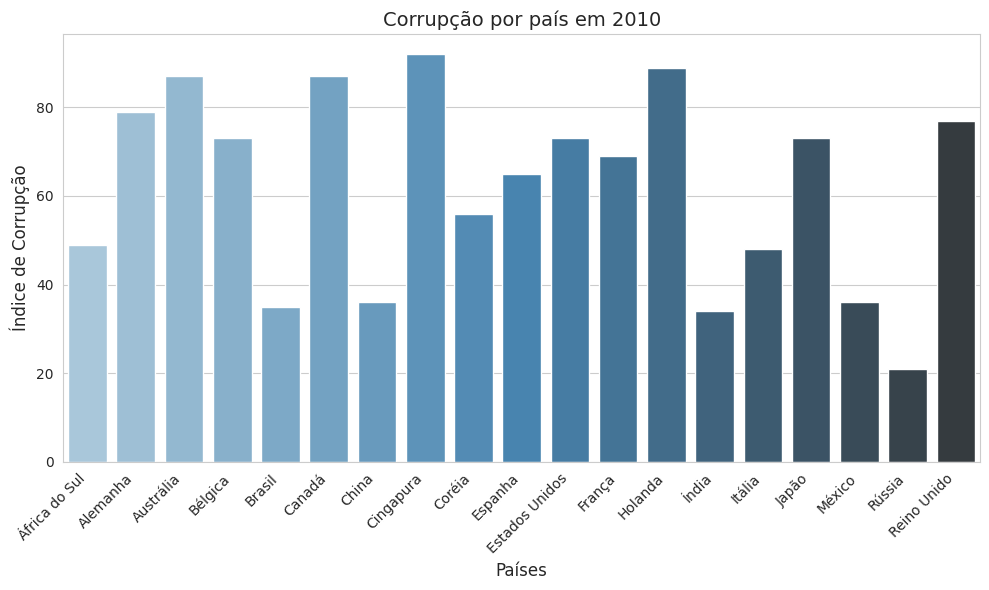

In [36]:
# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pais', y='corrupcao_indice', data=dados_2010, palette='Blues_d')
# Adicionando título e rótulos aos eixos
plt.xlabel("Países", fontsize=12)
plt.ylabel("Índice de Corrupção", fontsize=12)
plt.title("Corrupção por país em 2010", fontsize=14)

# Rotacionando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustando o layout para evitar cortes
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [32]:
# grafico linhas
dados_brasil = df_dados.query("pais == 'Brasil'")

Text(0.5, 1.0, 'IDH por Ano')

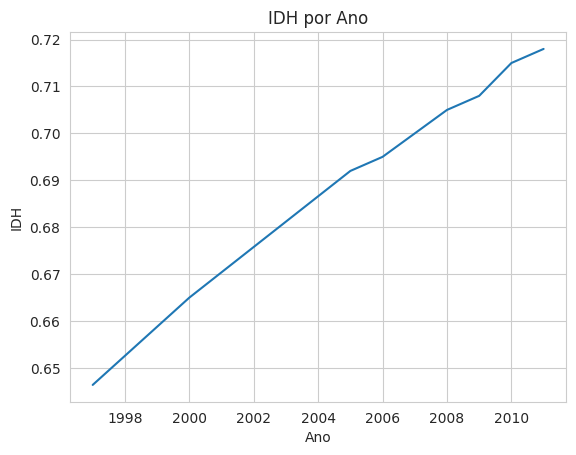

In [33]:
x_axi = dados_brasil.plot.line(x = 'ano', y = 'idh', legend=None)
plt.xlabel("Ano")
plt.ylabel("IDH")
plt.title("IDH por Ano")

/tmp/ipykernel_16089/2797932829.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='ano', y='idh', data=dados_brasil, palette='Blues_d')


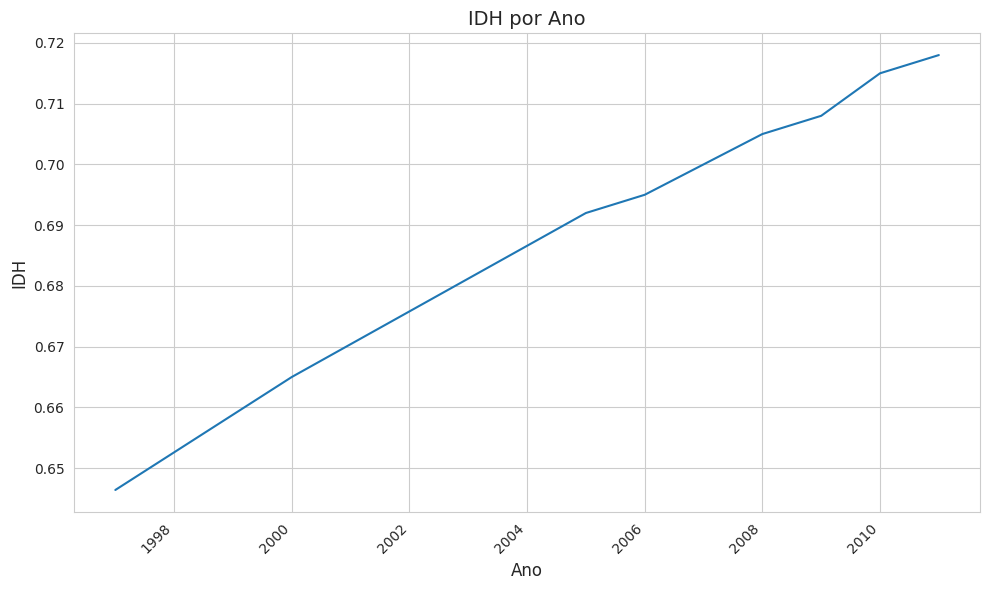

In [39]:
# Definindo o estilo do Seaborn
sns.set_style("whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='ano', y='idh', data=dados_brasil, palette='Blues_d')
# Adicionando título e rótulos aos eixos
plt.xlabel("Ano", fontsize=12)
plt.ylabel("IDH", fontsize=12)
plt.title("IDH por Ano", fontsize=14)

# Rotacionando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.show()